<!--NAVIGATION-->
< [$t$ & $F$ tests](13-t_F_tests.ipynb) | [Main Contents](Index.ipynb) | [Linear Models: ANOVA](15-anova.ipynb) >

# Linear Models: Regression <span class="tocSkip">`

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span></li><li><span><a href="#Exploring-the-data" data-toc-modified-id="Exploring-the-data-2">Exploring the data</a></span><ul class="toc-item"><li><span><a href="#Correlations" data-toc-modified-id="Correlations-2.1">Correlations</a></span></li><li><span><a href="#Transformations-and-allometric-scaling" data-toc-modified-id="Transformations-and-allometric-scaling-2.2">Transformations and allometric scaling</a></span></li><li><span><a href="#Regression" data-toc-modified-id="Regression-2.3">Regression</a></span></li><li><span><a href="#Plotting-the-model" data-toc-modified-id="Plotting-the-model-2.4">Plotting the model</a></span></li><li><span><a href="#Model-diagnostics" data-toc-modified-id="Model-diagnostics-2.5">Model diagnostics</a></span></li><li><span><a href="#Reporting-the-model" data-toc-modified-id="Reporting-the-model-2.6">Reporting the model</a></span></li></ul></li></ul></div>

# Introduction

Aims of this chapter:

* More functions for plotting data and models.

* Calculating correlation coefficients.

* Fitting a regression model and significance testing.

* Using diagnostic plots to assess model suitability.

As with the previous chapters, we'll start with creating a new blank script for you to fill in during the practical (the script file `regress.R` is also available from TheMulQuaBio). We'll also be using the genome size data again, so:

$\star$ Open R and `setwd` to your `code` directory.

$\star$ Create a new blank script called `Regression.R` and add some introductory comments.

$\star$ Add code to your script to load the genome size data into R and check it:

In [4]:
genome <- read.csv('../data/GenomeSize.csv')

head(genome)

Suborder,Family,Species,GenomeSize,GenomeSE,GenomeN,BodyWeight,TotalLength,HeadLength,ThoraxLength,AdbdomenLength,ForewingLength,HindwingLength,ForewingArea,HindwingArea,MorphologyN
Anisoptera,Aeshnidae,Aeshna canadensis,2.20,NA,1,0.159,67.58,6.83,11.81,48.94,45.47,45.40,369.57,483.61,2
Anisoptera,Aeshnidae,Aeshna constricta,1.76,0.06,4,0.228,71.97,6.84,10.72,54.41,46.00,45.48,411.15,517.38,3
Anisoptera,Aeshnidae,Aeshna eremita,1.85,NA,1,0.312,78.80,6.27,16.19,56.33,51.24,49.47,460.72,574.33,1
Anisoptera,Aeshnidae,Aeshna tuberculifera,1.78,0.10,2,0.218,72.44,6.62,12.53,53.29,49.84,48.82,468.74,591.42,2
Anisoptera,Aeshnidae,Aeshna umbrosa,2.00,NA,1,0.207,73.05,4.92,11.11,57.03,46.51,45.97,382.48,481.44,1
Anisoptera,Aeshnidae,Aeshna verticalis,1.59,NA,1,0.220,66.25,6.48,11.64,48.13,45.91,44.91,400.40,486.97,1


# Exploring the data

In previous chapters we used `plot` to create a scatterplot between two variables. If you have a set of variables to explore, writing code for each plot is tiresome, so R provides a the function `pairs`, which creates a grid of scatterplots between each
pair of variables. All it needs is a dataset.

$\star$ Add `pairs(genome, col=genome$Suborder)` into your script and run the code:

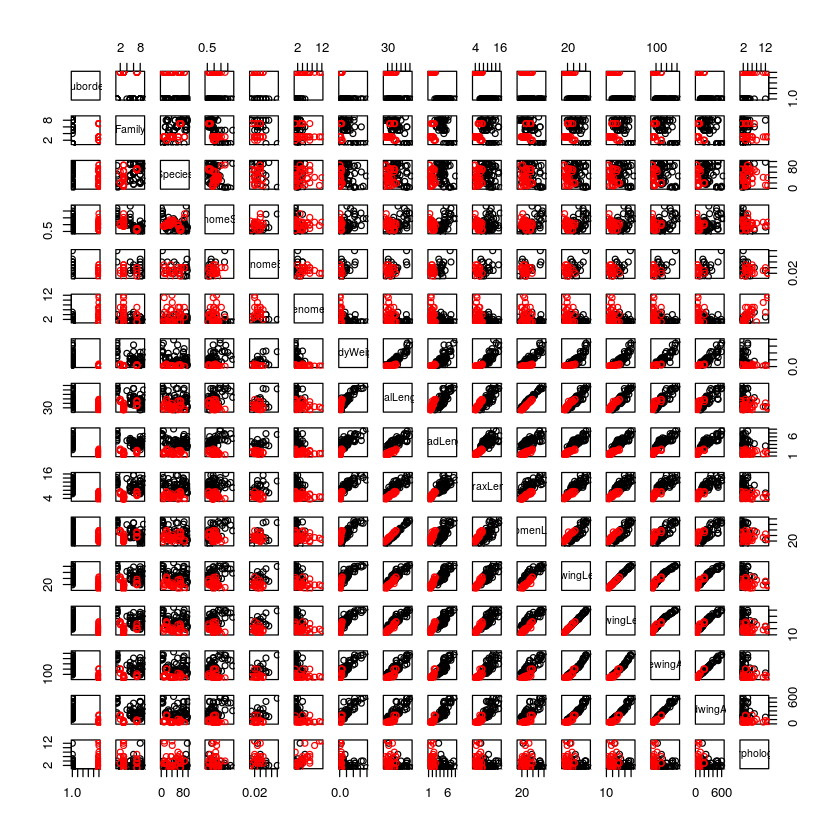

In [6]:
pairs(genome, col=genome$Suborder)

The result is messy! There are far too many variables in `genome` for this to be useful. We need to cut down the data to fewer variables. [Previously](12-ExpDesign.ipynb#Explore-further-by-scatter-plotting-two-variables) we used indices to select colours; here, we can use indices to select columns from the data frame. This again uses square brackets (`x[]`), but a data frame has two dimensions, rows and columns, so you need to provide an index for each dimension, separated by commas. If an index is left blank, then all of that dimension (i.e. all rows or columns) are selected. Try the following to re-acquaint yourself to access data frame content using indices:

In [7]:
# create a small data frame:
dat <- data.frame(A = c("a", "b", "c", "d", "e"), B = c(1, 2, 3, 4, 5))
dat[1, ] # select row 1 (all columns selected)

A,B
a,1


In [8]:
dat[, 2] # select column 2 (all rows selected)

[1] 1 2 3 4 5

In [9]:
dat[2, 1] # select row 2, column 1

[1] b
Levels: a b c d e

Now let's get started with the actual analysis. We will look at five key variables: genome size, body weight, total length, forewing length and forewing area. If you look at the output of `str(genome)`, you'll see that these are in columns 4, 7, 8, 12 and 14. We can record the indices of these columns and use this to select the data in the pairs plot:

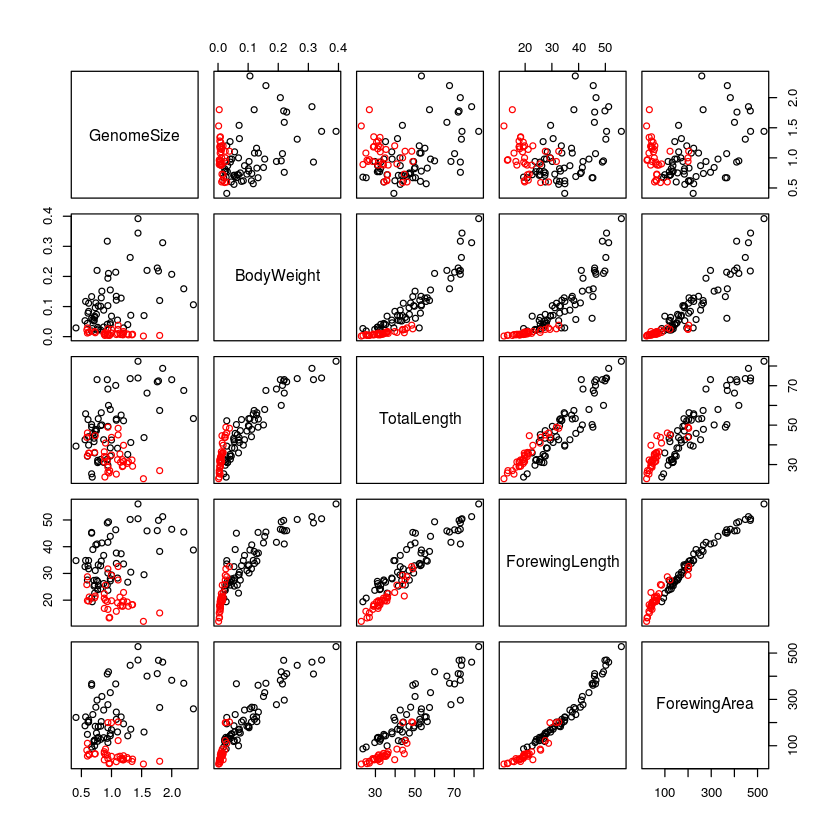

In [11]:
morpho_vars <- c(4, 7, 8, 12, 14) # store the indices
pairs(genome[, morpho_vars], col = genome$Suborder)

$\star$ Add the code above to your script and run it.

In the figure above, each scatterplot is shown twice, with the variables swapping between the $x$ and $y$ axes. You can see immediately that the relationships between the four morphological measurements and genome size are fairly scattered but that the plots comparing morphology show much clearer relationships.

## Correlations

One way of summarising how close strong the relationship between these variables are is to calculate a correlation coefficient. Pearson correlations look at the difference of each point from the mean of each variable (and since it uses means, it is a parametric statistic).

It is calculated using of the differences from the mean on each axis. The key calculation is — for each point – to get the product of the differences on each axis and add them up. If the points are mostly top left ($-x$, $y$) or bottom right ($x$, $-y$) then these products are mostly negative ($-xy$); if the points are mostly top right ($x$, $y$) or bottom left ($-x$, $-y$) then the products are mostly positive ($xy$).

---
<figure>
    <img src="./graphics/corr.png" alt="correlation" style="width:70%">
    <small> 
            <figcaption> 
           Illustration of what the Pearson correlation coefficient means.
            </figcaption>
        </center>
    </small>
</figure>

---



The plots above show three clear cases where all the values of $xy$ are negative or positive or where both are present and sum to zero. The Pearson correlation coefficient simply scales these sums of $xy$ to be between -1 (perfectly negatively correlated) and 1 (perfectly positively correlated) via zero (no correlation).

We will use two functions to look at correlations. The first is `cor`, which can calculate correlations between pairs of variables, so is a good partner for `pairs` plots. The second is `cor.test`, which can only compare a single pair of variables, but uses a $t$ test to assess whether the correlation is significant.

$\star$ Try the following (and include it in your R script file):

In [12]:
cor(genome[, morpho], use = "pairwise")

,GenomeSize,BodyWeight,TotalLength,ForewingLength,ForewingArea
GenomeSize,1.0000000,0.3430934,0.3407077,0.2544432,0.3107247
BodyWeight,0.3430934,1.0000000,0.9167995,0.8944228,0.9198821
TotalLength,0.3407077,0.9167995,1.0000000,0.9225974,0.9077555
ForewingLength,0.2544432,0.8944228,0.9225974,1.0000000,0.9829803
ForewingArea,0.3107247,0.9198821,0.9077555,0.9829803,1.0000000


This is the correlation matrix. Then:

In [13]:
cor.test(genome$GenomeSize, genome$TotalLength, use = "pairwise") 


	Pearson's product-moment correlation

data:  genome$GenomeSize and genome$TotalLength
t = 3.5507, df = 96, p-value = 0.0005972
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1526035 0.5049895
sample estimates:
      cor 
0.3407077 


The `use='pairwise'` tells R to omit observations with missing data and use complete pairs of observations. The first function confirms our impressions from the graphs: the
correlations between genome size and morphology are positive but comparatively weak and the correlations between morphological measurements are positive and very strong (i.e. close to 1). The correlation test tells us that genome size and body length are positively correlated (r=0.34, $t$ = 3.5507, df = 96, $p$ = 0.0006). 

*Remember this example when reporting correlations in your reports &ndash; all this information needs to be included*

## Transformations and allometric scaling

There is one problem with the correlations above: *the correlation coefficient calculation assumes a straight line relationship*. Some of the scatterplots above are fairly straight but there are some strongly curved relationships. This is due to [allometric scaling](https://en.wikipedia.org/wiki/Allometry), where one body measure changes (or grows) disproportionately with respect to another. Here, two of the variables are in linear units (total and forewing length), one is in squared units (forewing area) and one in cubic units (body weight, which is approximately volume). That these measures are in different units itself guarantees that they will scale allometrically with respect to each other. 

The relationships between these variables can be described using a power law: 

$$y = ax^b$$

Fortunately, if we log transform this equation, we get $\log(y) = \log(a) + b \log(x)$. This is the equation of a straight line ($y=a+bx$), so we should be able to make these plots straighter by logging both axes. We saw [previously](13-t_F_tests.ipynb#$t$-tests-revisited) that we can create a new logged variable in the data frame like this:

In [14]:
genome$logGS <- log(genome$GenomeSize)

$\star$ Using this command as a template, create a new logged version of the five
variables listed above:

In [15]:
genome$logGS <- log(genome$GenomeSize)
genome$logBW <- log(genome$BodyWeight)
genome$logTL <- log(genome$TotalLength)
genome$logFL <- log(genome$ForewingLength)
genome$logFA <- log(genome$ForewingArea)

$\star$ Then, using `str`, work out which column numbers the logged variables are and create a new variable called `logmorpho` containing these numbers:

In [16]:
str(genome)

'data.frame':	100 obs. of  21 variables:
 $ Suborder      : Factor w/ 2 levels "Anisoptera","Zygoptera": 1 1 1 1 1 1 1 1 1 1 ...
 $ Family        : Factor w/ 9 levels "Aeshnidae","Calopterygidae",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Species       : Factor w/ 100 levels "Aeshna canadensis",..: 1 2 3 4 5 6 8 17 46 53 ...
 $ GenomeSize    : num  2.2 1.76 1.85 1.78 2 1.59 1.44 1.16 1.44 1.2 ...
 $ GenomeSE      : num  NA 0.06 NA 0.1 NA NA NA NA NA NA ...
 $ GenomeN       : int  1 4 1 2 1 1 1 1 1 1 ...
 $ BodyWeight    : num  0.159 0.228 0.312 0.218 0.207 0.22 0.344 0.128 0.392 0.029 ...
 $ TotalLength   : num  67.6 72 78.8 72.4 73 ...
 $ HeadLength    : num  6.83 6.84 6.27 6.62 4.92 6.48 7.53 5.74 8.05 5.28 ...
 $ ThoraxLength  : num  11.8 10.7 16.2 12.5 11.1 ...
 $ AdbdomenLength: num  48.9 54.4 56.3 53.3 57 ...
 $ ForewingLength: num  45.5 46 51.2 49.8 46.5 ...
 $ HindwingLength: num  45.4 45.5 49.5 48.8 46 ...
 $ ForewingArea  : num  370 411 461 469 382 ...
 $ HindwingArea  : num  484 517 574

In [17]:
logmorpho <- c(17,18,19,20,21)

We can now use the `pairs` and `cor` test as beforefor the columns in `logmorpho`:

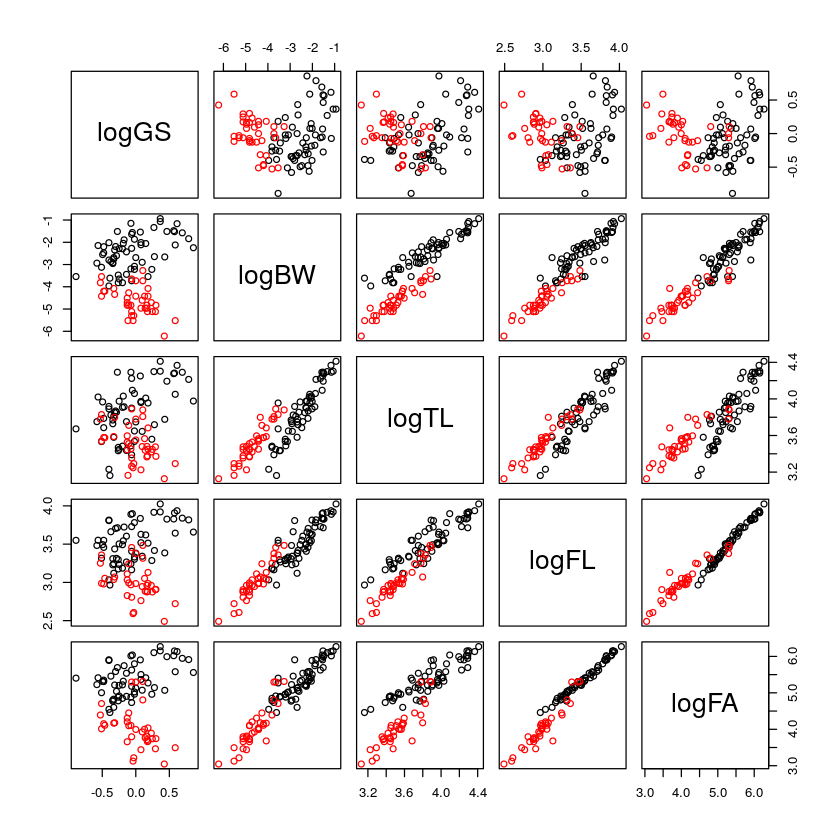

In [18]:
pairs(genome[, logmorpho], col=genome$Suborder)

In [19]:
cor(genome[, logmorpho], use='pairwise')

,logGS,logBW,logTL,logFL,logFA
logGS,1.00000000,0.08406293,0.2224443,0.1150025,0.06808306
logBW,0.08406293,1.00000000,0.8891899,0.9456492,0.94995683
logTL,0.22244431,0.88918989,1.0000000,0.9157695,0.86207098
logFL,0.11500250,0.94564919,0.9157695,1.0000000,0.97916470
logFA,0.06808306,0.94995683,0.8620710,0.9791647,1.00000000


The scatterplots show that logging the data has very successfully removed allometric scaling effects in the data.

## Performing the Regression analysis

We'll now look at fitting the first linear model of this course, to explore whether log genome size explains log body weight. The first thing to do is to plot the data:

./graphics/gsVbw.png

It is clear that the two suborders have very different relationships: to
begin with we will look at dragonflies (Anisoptera). We will calculate
two linear models:

This is the simplest linear model: nothing is going on and the response
variable just has variation around the mean: $y = \beta_1$. This is
written as an R formula as `y \~ 1`.

This models a straight line relationship between the response variable
and a continuous explanatory variable: $y= \beta_1 + \beta_{2}x$.

The code below fits these two models.

In [ ]:
> nullModelDragon <- lm(logBW ~ 1, data = genome, subset = Suborder == 
"Anisoptera")
> genomeSizeModelDragon <- lm(logBW ~ logGS, data = genome, subset = 
Suborder == "Anisoptera")

$\star$

Note the long names for the models. Short names are easier to type but
calling R objects names like `mod1`, `mod2`,
` xxx` swiftly get confusing!

Enter these models into your script and run them.

Now we want to look at the output of the model. Remember from the
lecture that a model has *coefficients* (the $\beta$ values
in the equation of the model) and *terms* which are the
explanatory variables in the model. We'll look at the
*coefficients* first:

In [ ]:
> summary(genomeSizeModelDragon) 
 Call:
 lm(formula = logBW ~ logGS, data = genome, subset = Suborder == 
     "Anisoptera")
 
 Residuals:
    Min     1Q Median     3Q    Max 
 -1.324 -0.612  0.097  0.519  1.324 
 
 Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
 (Intercept)  -2.3995     0.0908  -26.41  < 2e-16 ***
 logGS         1.0052     0.2398    4.19  9.5e-05 ***
 ---
 Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 
 
 Residual standard error: 0.697 on 58 degrees of freedom
   (2 observations deleted due to missingness)
 Multiple R-squared: 0.233, Adjusted R-squared: 0.219 
 F-statistic: 17.6 on 1 and 58 DF,  p-value: 9.54e-05  

There is a lot of information there: the model description (‘`
Call`'), a summary of the residuals, a table of coefficients and
then information on residual standard error, r squared and an $F$ test.
All of these will become clearer during this course — for the moment,
concentrate on the coefficients table.

There are two rows in the coefficient table, one for each coefficient in
$y=\beta_1 + \beta_2x$ — these are the intercept and the slope of the
line. The rest the details on each row are a $t$ test of whether the
slope and intercept are significantly different from zero.

Now we will look at the *terms* of the model using the
`anova` function. We will have a proper look at ANOVA
(Analysis of Variance) in chapter \[ch:ANOVA\]. Meanwhile, for our
current purposes, all you need to know is that ANOVA tests how much
variation in the response variable is explained by each explanatory
variable. We only have one variable and so there is only one row in the
output:

In [ ]:
> anova(genomeSizeModelDragon)

 Analysis of Variance Table
 
 Response: logBW
           Df Sum Sq Mean Sq F value  Pr(>F)    
 logGS      1   8.53    8.53    17.6 9.5e-05 ***
 Residuals 58  28.14    0.49                    
 ---
 Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

This table is comparing the variation in log body weight explained by
log genome size to the total variation in log body weight. We are
interested in how much smaller the residuals are for the genome size
model than the null model. Graphically, how much shorter are the red
residuals than the blue residuals:

./graphics/regResid.png

We can get the sums of the squares of these residuals from the two
models using the function `resid`, and then square them and
add them up:

In [ ]:
> sum(resid(nullModelDragon) ^ 2)
 [1] 36.67
 
> sum(resid(genomeSizeModelDragon) ^ 2)
 [1] 28.14

So we have five columns in the table:

This shows the degrees of freedom. Each fitted parameter/coefficient
takes up a degree of freedom from the total sample size, and the left
over are the residuals degree of freedom. In this case, genome size adds
a slope (compare the null model $y=\beta_1$ and this model
$y=\beta_1 + \beta_2x$ — there is one more $\beta$).

This shows sums of squares. The bottom line is the residual sum of
squares for the model and the one above is the variation explained by
genome size. Using the two values from above, the sums of square
residuals for the null model are 36.67. In the genome size model, the
sum of square residuals are 28.14 and so $36.67-28.14=8.53$ units of
variance have been explained by this model.

These are just the Sum Sq (Sum of Squares) values divided by the degrees
of freedom. The idea behind this is simple: if we explain lots of
variation with one coefficient, that is good (the null model), and if we
explain a small amount of variation with a loss of degree of freedom (by
adding and then estimating more parameters), then that is bad.

This is the ratio of the Mean Sq for the variable and the residual Mean
Sq. This is used to test whether the explained variation is large or
small.

This is a $p$ value — the probability of the variable explaining this
much variance by chance.

In this case, it is clear that genome size explains a significant
variation in body weight.

$\star$

Include the `summary` and `anova` commands for
` genomeSizeModelDragon` in your script, run them and check
you are happy with the output.

Using this code as a template, create a new model called `
genomeSizeModelDamsel` that fits log body weight as a function of
log genome size for damselflies.

Write and run code to get the `summary` and
`anova` tables for this new model.

Plotting the model
------------------

Now we can plot the data and add lines to show the models. For simple
regression models, we can use the function
`abline(modelName)` to add a line based on the model.

$\star$

You already know how to create and customise scatterplots from previous
chapters. Create a plot of log body weight as a function of log genome
size, picking your favourite colours for the points.

Use `abline` to add a line for each model and use the `
col` option in the function to colour each line to match the
points. For example: `abline(genomeSizeModelDragon,
col='red')`.

You should get something like Figure \[fig:GenoRegModels\].

![Linear regression models fitted to the body weight vs. genome size to
the Dragonfly (red) and Damselfly (blue) subsets of the data.<span
data-label="fig:GenoRegModels">`](GenoRegModels.pdf)

Model diagnostics
-----------------

Now that we have our models, we need to check that they are appropriate
for the data. For this, we will inspect “diagnostic plots”. Producing
diagnostic plots is easy in R — if you `plot` a model, then R
produces a set of diagnostic plots!

$\star$

Try the following code (and include in the R script file):

In [ ]:
> par(mfrow = c(2, 2), mar = c(5, 5, 1.5, 1.5))
> plot(genomeSizeModelDragon)

This should give the plots shown in figure \[fig:DiagModDragon\].

![Diagnostics for the `lm` fit to the Dragonfly data
subset.<span
data-label="fig:DiagModDragon">`](DiagModDragon.pdf)

And,

In [ ]:
> par(mfrow = c(2, 2), mar = c(5, 5, 1.5, 1.5))
> plot(genomeSizeModelDamsel)

This should give the plots shown in figure \[fig:DiagModDamsel\].

![Diagnostics for the `lm` fit to the Damselfly data
subset.<span
data-label="fig:DiagModDamsel">`](DiagModDamsel.pdf)

The diagnostic plots are:

This plot is used to spot if the distribution of the residuals (the
vertical distance from a point to the regression line) has
*similar variance* for different predicted values (the
y-value on the line corresponding to each x-value). There should be no
obvious patterns (such as curves) or big gaps. If there was no scatter,
if all the points fell exactly on the line, then all of the dots on this
plot would lie on the gray horizontal dashed line. The red line is a
smoothed curve to make it easier to see trends in the residuals. It is
flat in the Dragonfly model fit (Figure \[fig:DiagModDragon\]), and a
bit more wavy than we would like in the in the Damselfly model fit
(Figure \[fig:DiagModDamsel\]), but there are no clear trends in either,
which is what you hope to see.

This plot is to check whether the residuals are *normally
distributed* ` — are the values of the observed residuals similar
to those expected under a normal distribution? Ideally, the points
should form a perfectly straight line, indicating that the observed
residuals exactly match the expected. Here, note that the points lie
pretty close to the dashed line in both Figures \[fig:DiagModDragon\] &
\[fig:DiagModDamsel\], but deviate at the ends, especially for
Damselflies. However, some deviation is to be expected near the ends —
here these deviations are just about acceptable.

The x-axis on this plot is identical to the Residuals vs Fitted plot –
these are the fitted values. The y-axis is the square root of the
*standardized residuals*, which are residuals rescaled so
that they have a mean of zero and a variance of one. As a result, all
y-axis values are positive. Thus large residuals (both positive and
negative) plot at the top, and small residuals plot at the bottom (so
only their *scale* is retained). Thus, all of the numbered
points (which will be the same in all plots) plot at the top here. The
red line here shows the trend, just like the Residuals vs Fitted plot.
The regression analysis has assumed homoscedasticity, that the variance
in the residuals doesn't change as a function of the predictor. If that
assumption is correct, the red line should be relatively flat. It is not
quite as flat as we would like, especially for the Dragonfly analysis
(Figure \[fig:DiagModDragon\]).

This plot shows the standardized residuals against leverage. “Leverage”
is a measure of how much each data point influences the linear model's
coefficient estimates. Because the regression line must pass through the
centroid (“pivot point”) of the data (Figure \[fig:Leverage\]), points
that lie far from the centroid have greater leverage, and their leverage
increases if there are fewer points nearby. There are two key things to
note about this plot:

![Leverage of data points on slope of a regression. The points further
away from the centroid in the x-axis direction have more leverage, and
can therefore move the regression line up or down (dashed red
lines).<span
data-label="fig:Leverage">`](Leverage.pdf)

1.  The standardized residuals (y-axis) are centered around zero and
    reach 2-3 standard deviations away from zero. They should also lie
    symmetrically about zero, as would be expected for a
    normal distribution. This is the case for the Damselfly plot
    (Figure \[fig:DiagModDamsel\]) , but not so much for the Dragonfly
    plot Figure \[fig:DiagModDragon\].

2.  The contours values show *Cook's distance* (only
    visible in the Damsefly plot), which measures how much the
    regression would change if a point was deleted. Cook's distance is
    increased by leverage and by large residuals: a point far from the
    centroid with a large residual can severely distort the coefficient
    estimates from the regression. On this plot, you want to see that
    the red smoothed line stays close to the horizontal gray dashed line
    and that no points have a large Cook's distance (i.e, &gt;0.5). Both
    are true here.

This is an important diagnostic plot in regression analyses in
particular because it tells you whether your estimate of the slope
coefficient in particular is strongly affected by certain data points.

Note that certain points are numbered in all the plots — these are
points to pay special attention to because they are
*potential* outliers. The numbers correspnd to the row
number for that dataset in your data frame. You can easily identify
these points in your data plot (Figure \[fig:GenoRegModels\]) because
the order of the points along the fitted values axis (y-axis) in the
diagnostic plot matches the order along the x-axis in the data plot. So,
fo example here, in Figure \[fig:DiagModDragon\], the two numbered
points (46, 10) near the bottom correspond in the data plot (Figure
\[fig:GenoRegModels\]) to the two red points near the center-left that
lie farthest below the red line.

Thus, neither the Drangonfly nor the Damselfly diagnostic plots look
perfect, but this level of deviation from assumptions of linear models
is acceptable. The main worrying factors are that the QQ plot for
Damselflies indicates the observed residuals are a bit more extreme than
expected, and the Scale–Location plot for Dragonflies suggests some
pattern in the standardized residuals wrt location of the fitted values.

$\star$

Copy the code to create the diagnostic plots into your script to keep a
record of the code and run it.

Reporting the model
-------------------

Now we know that the models are appropriate and we have a plot, the last
thing is to report the statistics. For the damselfly model, here is one
summary that would do: log genome size explains significant variation in
log body weight in dameselflies (F=10.5, df=1,36, p=0.0025) and shows
that body weight decreases with genome size (intercept: -4.65, se=0.09;
slope: -1.14, se=0.35).